**Task 3(a): Take grayscale image of size 512x512, add some salt & pepper noise, apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR**

### Importing the Libraries

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Harmonic Mean Filter
- **The Harmonic Mean Filter works well for salt noise, but fails for pepper noise. It does well also with other types of noise like Gaussian noise.**

In [38]:
def apply_harmonic_mean_filter(image, mask_size):
    filtered_image = []
    height, width = image.shape
    offset, num_of_pixel = mask_size // 2, mask_size * mask_size

    for r in range(height):
        nth_row = []
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += float(1 / (image[r + x, c + y] + 1e-4))
            pixel = num_of_pixel / pixel
            pixel = 255 if pixel > 255 else pixel
            nth_row.append(pixel)
        filtered_image.append(nth_row)

    return np.uint8(filtered_image)    

### Function for Geometric Mean Filter

In [39]:
def apply_geometric_mean_filter(image, mask_size):
    filtered_image = []
    height, width = image.shape
    offset = mask_size // 2

    for r in range(height):
        nth_row = []
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (image[r + x, c + y]):
                            count += 1
                            pixel = pixel * int(image[r + x, c + y])
            count = 1 if count == 0 else count
            pixel = pixel ** (1 / count)
            nth_row.append(pixel)
        filtered_image.append(nth_row)

    return np.uint8(filtered_image)   

### Function for adding Salt & Pepper Noise

In [40]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

### Function for calculating PSNR (Peak Signal to Noise Ratio)
- **Function: psnr = cv2.PSNR(image1, image2)**

In [41]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    return round(psnr, 2)

### Loading the Image

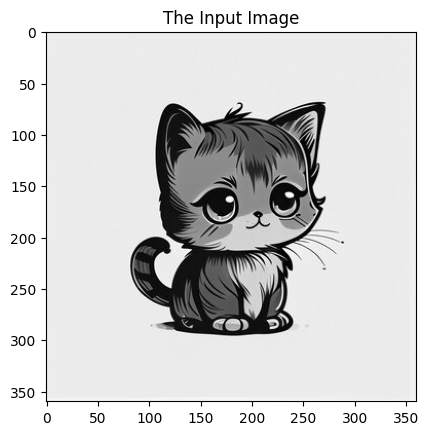

In [42]:
input_image = cv2.imread("./Cat 360x360.jpg", 0)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("The Input Image")
plt.show()

### Adding Salt & Pepper Noise to the Image

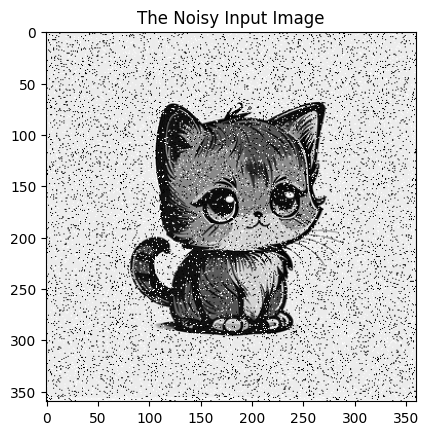

PSNR = 12.73


12.734843480520052

In [43]:
noisy_input_image = add_salt_pepper_noise(input_image, 7)
plt.imshow(cv2.cvtColor(noisy_input_image, cv2.COLOR_BGR2RGB))
plt.title("The Noisy Input Image")
plt.show()
psnr = compute_psnr(input_image, noisy_input_image)
print(f"PSNR = {psnr}")
cv2.PSNR(input_image, noisy_input_image)

### Applying Harmonic Mean Spatial Filter

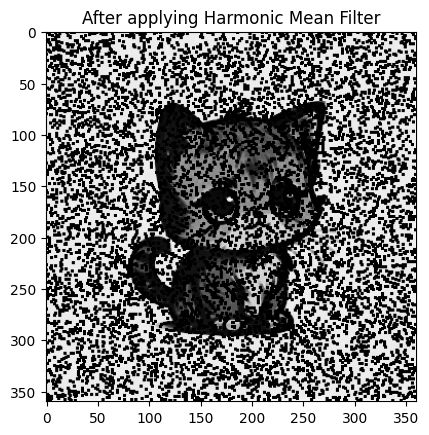

PSNR = 4.92


In [44]:
mask_size = 3
harmonic_filtered_input_image = apply_harmonic_mean_filter(noisy_input_image, mask_size)
plt.imshow(cv2.cvtColor(harmonic_filtered_input_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Harmonic Mean Filter")
plt.show()
psnr = compute_psnr(input_image, harmonic_filtered_input_image)
print(f"PSNR = {psnr}")

### Applying Geometric Mean Spatial Filter

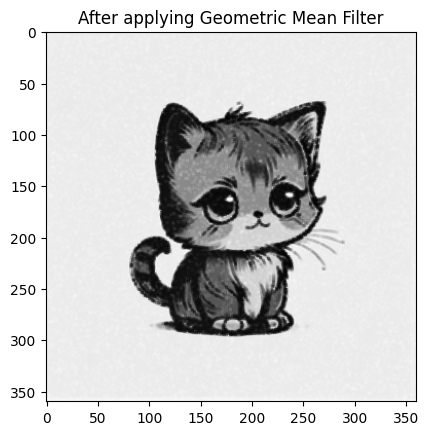

PSNR = 23.61


In [45]:
mask_size = 3
geometric_filtered_input_image = apply_geometric_mean_filter(noisy_input_image, mask_size)
plt.imshow(cv2.cvtColor(geometric_filtered_input_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Geometric Mean Filter")
plt.show()
psnr = compute_psnr(input_image, geometric_filtered_input_image)
print(f"PSNR = {psnr}")